# Computer Lab: Lasso

    Lab  : Convex analysis - DataScience Master
    Authors : Alexis blanchet
    


### 1- Data

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_svmlight_file('triazines.txt')
X,y = data[0],data[1]

In [3]:
A = preprocessing.scale(X.todense())
b = preprocessing.scale(y)

In [4]:
print(np.mean(A),np.mean(b))

-1.41344522705e-15 3.70074341542e-16


  ### 2 - Proximal Operator of the indicator of the $l1$ ball
  
   #### Question 2.1
   
   Supposing that $||w||_1 \leq r$ then $w$ is in the convex $l1$ ball thus we can find a solution, in the convex, minimizing the projection. And the distance is then equal to 0 for $x = 0$ thus $P(w) = w$.
   
   #### Question 2.2
   
   let's now show that $ \forall \; i \; :P(w)_iw_i \geq 0$.
   for that we will suppose otherwise: $\exists \; j$ such as $P(w)_jw_j < 0$ 
   
   the we buid $\hat{P(w)}$ such as $\hat{P(w)}_i = P(w)_i \forall \; i \neq j$ and $\hat{P(w)}_j = -P(w)_j$
   
   then let's compute $\frac{1}{2}(||P(w)-w||_2^2 - ||\hat{P(w)}-w||_2^2)$
   
   by developping the scalar product we obtain $<\hat{P(w)}-P(w),w> = -2P(w)_jwj>0$
   thus we have found a vector satisfying the conditions and that has an objective value lower that the one we assumed was the minimum. This absurd and thus $ \forall \; i \; :P(w)_iw_i \geq 0$.
   
   let's now show that $||P(w)||_1 = r$
   
   to do so we will again suppose otherwise and show that we can built a vector wich achieve a better minimum for the objective function(projector)
   to do so we built the following vector $\hat{P(w)}_\lambda = P(w) + \lambda(w-P(w)) $. As the previous vector is IN the $l$ ball we know that it exists a $0<\lambda<1 $ such as $\hat{P(w)}_\lambda$ is ON the ball (continuous function of $\lambda$). Meaning that $||\hat{P(w)}_\lambda||_1 = r$
   As such we now compute as before the difference of the objective function between the old vector and the new one and we find a positive value for such $\lambda > 0$ (we find  $||P(w)-w||_2^2(1-(1-\lambda)^2)$ and thus we have build a better solution for this problem wich is absurd. Thus $||P(w)||_1 = r$.
   
  #### Question 2.3
  
  from the question 2.2 the solution is on the ball and in have a sign for it's coordinate equal to the sign of the coordinates of $w$. Thus if we find the solution for on the ball for $|w|$ then we can find the solution for $w$ by multiplying by the sign of $w$. And as the solution is on the ball with positive coordinate the condition is rewritten as $\sum_i x_i = r$ with  $\forall \; i : \; x_i \geq 0$
  
  thus the result.
  
  #### Question 2.4
  
  let's show the equivalence:  
  let assume first than $x^* = \tilde{P}(w)$
  then we have:
  
  * $(\sum_i^m x_i^* -r ) = 0$
  * $x_j^* \geq 0 \; \forall \; i =>\sum_i^m \mathcal{i}_{\mathbb{R}_+}(x_i^*) = 0$  

we can now deduce that $L(x^*,\theta) = \frac{1}{2}||x^*-w||^2_2$  
we also have $inf_x L(x,\theta^*) = L(x^*,\theta^*)$ (from the formula of L)  
And so $sup_\theta L(x^*,\theta) = L(x^*,\theta^*)$   

from the questions before we can infer $\forall \; i \; : |P(w)_i| = \tilde{P}(|w|)_i $  

and from the points above it comes $P(w) = sign(w).\tilde{P}^*(|w|)$
hence $\exists \theta^* \in \mathbb{R}$ such as $(x^*,\theta^*)$ is a saddle point of $L(x,\theta)$  


for the other side:  
let's assume $\exists \theta^* \in \mathbb{R}$ such as $(x^*,\theta^*)$ is a saddle point of $L(x,\theta)$
then the dual gap is equal to 0.  
thus $x_i^* \geq 0 \; \forall \; i$


also $L(x^*,\theta^*) = sup_\theta inf_x L(x,\theta)$  
hence we have necessarely $\sum_i^m x_i^* =r $  

Finally: $L(x^*,\theta^*) = inf_x L(x,\theta^*)$  
we rewrite this by simplifying it and using what's abose to conclude that $x^*$ is also solution of problem defined above and thus $x^* = \tilde{P}(w)$


  
#### Question 2.5
  from the question 2.4 knowing that for the solution $x^*=\tilde{P}(w)$ it exists $\theta^*$ such as $(x^*,\theta^*)$ is a saddle point.
  as such the two partial derivate are equale to zero. We also keep the condition $\forall \; i : \; x_i \geq 0$
  as such we obtain:
  $ \forall \; i\in\{1,...,m\}:$
  $ x^*_i = max(0,w_i-\theta^*) $
  and
  $ \sum_{j=1}^m max(0,w_i-\theta^*) = r $
  
  #### Question 2.6
  let's assume $w_i \geq w_j$ 
  then if $(\tilde{P}(w)_i = 0$)  we have $ w_i -\theta^* \leq 0$ thus $w_j-\theta^* \leq 0$ and we have $(\tilde{P}(w)_j = 0$)

  #### Question 2.7
  let's design an algorithm to compute $\tilde{P}(w)$
  
start:  
w <- abs(w)  
theta_new,theta_old = $\frac{\sum_j - r}{m},0$  
while(theta_new -theta_old > epsilon) do:  
+   x* = [max(0,w_j-theta_new]  
-   idx <- indices where x* is non-nul  
*   theta_old = new_theta  
*   new_theta = $\frac{\sum_{j \in idx} w_j - r}{len(idx)}$  

return x*

#### Question 2.8
let's now code this algorithm and test it

In [5]:
def projection_on_l1_ball(w,r,epsilon=10**-10,verbose = True):
    
    if verbose : print("rayon de la boule l1: "+str(r))
    w_sorted = np.sort(np.abs(w))
    m = len(w_sorted)
    teta_new = (np.sum(w_sorted)-r)/m
    teta_old = 0
    t = [teta_new]
    k=0
    while abs(teta_new-teta_old)>epsilon:
        k+=1
        if verbose :print(str(k)+" iteration")
        proj = [np.maximum(0,w_sorted[j]-teta_new) for j in range(m)]
        if verbose :print("norme du projeté: " +str(np.sum(proj)))
        teta_old = teta_new
        res = 0
        j = 0
        for i in range(len(proj)):
            if proj[i]>0: 
                res+= w_sorted[i]
                j+=1
        teta_new = (res-r)/j
        t.append(teta_old)
    sgn = [1 if wj>0 else -1 for wj in w]
    proj = [a*b for a,b in zip(proj,sgn)]
    return proj,t

rayon de la boule l1: 69.8296059929
1 iteration
norme du projeté: 81.467939812
2 iteration
norme du projeté: 70.3841068683
3 iteration
norme du projeté: 69.8421566437
4 iteration
norme du projeté: 69.8296059929


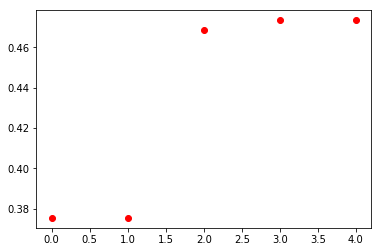

In [6]:
u,t = projection_on_l1_ball(b,np.linalg.norm(b,1)/2)
plt.plot(t,'ro')


## 3- Résolution  of the Lasso problem

#### Question 3.1

For such a fonction the gradient is equal to $A^t(Ax-b)$

##### Question 3.2
let's now code the proximale gradient for Problem(1) with r=1

In [7]:
from scipy.linalg import norm

def grad(x,A,b):
    return A.T.dot(A.dot(x) - b)

def get_step(A):
    n = len(A[0])
    return (1/norm(A, ord=2) ** 2 / (4.*n)) 


def proximal_gradient(r,A,b,epsilon=0.00001):
    """ISTA algorithm."""
    n = len(A[0])
    x_init = np.zeros(n)
    step=get_step(A)
    x = x_init.copy()
    x_old = np.ones(n)
    err = 1000
    while err> epsilon:
        x,_ = projection_on_l1_ball(x-step*grad(x,A,b),r,verbose=False)
        err = norm([x-x_old for x,x_old in zip(x,x_old)])
        #print(err)
        x_old = x
    return x


In [8]:
x_prox_grad = proximal_gradient(1,A,b)
type(x_prox_grad)

list

In [9]:
print(np.sum(np.abs(x_prox_grad)))

1.0


## 4-Comparaison of the two lasso formualtions

#### Question 4.1
let's first show that if it exist $x^*$ solution of the problem (1) with parameter r then there exists $\alpha(r) \geq 0$ such as $x^*$ is solution to problem (2) with parameter $\alpha(r)$ and if it exist $x^*$ solution of the problem (2) with parameter $\alpha$ then there exists $r(\alpha) \geq 0$ such as $x^*$ is solution to problem (2) with parameter $r(\alpha)$.
first let's notice that:   
$$
(2) = \left\{
    \begin{array}{ll}
        \min_{x} \frac{1}{2}||Ax-b||^2_2+\alpha||x||_1 \\
        x \in \mathbb{R}^m
    \end{array}
\right.
$$

we can rewrite it 
$$
(2) = \left\{
    \begin{array}{ll}
        \min_{x} \frac{1}{2}||z-b||^2_2+\alpha||x||_1 \\
        z = Ax
    \end{array}
\right.
$$

the lagrangian of this problem is written after simplifaction:
    $$ L(x,z,u) =  \frac{1}{2} ||z||^2_2 +\frac{1}{2} ||b||^2_2 + (u-b)^Tz+\alpha||x||_1-u^TAx $$  
   
we see here that there is one part depending on Z only and one part depending on x only.  
thus:  
    $$ argmin_x L(x,z,u) =  argmin_x \alpha ||x||_1 - u^TAx$$
as this function is not differenciable we will use the subgradient.
as such it now comes: $ | A_i^Tu^*| < \alpha => x_i^* = 0$  
for $$ argmin_z L(x^*,z,u) =  argmin_z \frac{1}{2} ||z||^2_2 +\frac{1}{2} ||b||^2_2 + (u-b)^Tz$$ it comes:  
$$z^* = b-u^*$$ 
let's remind that the dual objective is given by:
$$\Delta_\alpha(u) = \inf_{x,z} L(x,z,u)$$
as such we have:
$$
\left\{
    \begin{array}{ll}
        \Delta_\alpha(u) = \frac{1}{2} ||b||^2_2 -  \frac{1}{2} ||z||^2_2 - \frac{1}{2} ||b-u^*||^2_2 \\
        | A_i^Tu^*| < \alpha \; \forall i
    \end{array}
\right.
$$  
and then by strong duality:
$$\Delta_\alpha(u) \leq \Delta_\alpha(u^*) = P_\alpha(x_\alpha^*) \leq P_\alpha(x) $$
let's now use all of that:



we write the lagrangian for Problem (1) and use the KKT connditions:
$$
\left\{
    \begin{array}{ll}
        \nabla_x L(x^*,\theta^*) = 0 \\
        \theta^*(||x||_1 - r) = 0 \\
        \theta^* \geq 0
    \end{array}
\right.
$$  
if we assume $x^*$ is solution of (2) with parameter $\alpha$ then $x^* = x^*(\alpha)$ and if we define $r=||x^*(\alpha)||_1$
then $\theta^*= \alpha and x^* = x^*(alpha)$ is satisfying the KKT conditions for problem (1) hence we have that $x^* = x^*(\alpha)$ is solution of problem (1) with parameter $r(\alpha) = ||x^*(\alpha)||_1$  
Now let's assume  $x^*$ is solution of problem (1) with parameter r.
let's take $X_0^T = (r,.....,0)$ then the stater conditions are verified thus $\exists \theta^*$ such as $(x^*,\theta^*)$ is a saddle point of the Lagrangian of the problem given by:
$$L(x,\theta= \frac{1}{2}||Ax-b||^2_2 + \theta(||x||_1-r) - \mathcal{i}_\mathbb{R^+}(\theta)$$
the definition of the saddle point (dual gap is equal to zero), we now have:
$$
\left\{
    \begin{array}{ll}
        \theta^* \in argmax_\theta \theta(||x||_1-r)- \mathcal{i}_\mathbb{R^+}(\theta) \\
        x^* \in argmin_x \frac{1}{2}||Ax-b||^2_2 + \theta^*(||x||_1)
    \end{array}
\right.
$$
hence $\theta^* = \theta^*(r)$ and we have $x^*$ solution of (2) with parameter $\alpha(r) = \theta^*(r)$



#### Question 4.2

In [10]:
from numpy.linalg import norm
def prox_lasso(x, s, t=1.):
    """Proximal operator for the Lasso at x with strength t"""    
    s = t*s
    return [xi+s if xi < -s else xi-s if xi > s else 0 for xi in x]
    
def lasso(x, s):
    """Value of the Lasso penalization at x with strength t"""
    return s*norm(x,1)

def grad_linreg(x,A,b):
    return A.T.dot(A.dot(x) - b)

    
def loss_linreg(x,A,b):
    """Least-squares loss"""
    return (.5)*((norm(A.dot(x)-b))**2)

L = norm(A)**2

def ista(A,b,s, f= loss_linreg, grad_f = grad_linreg, g = lasso, prox_g = prox_lasso, step =1/L ,epsilon = 0.0001, verbose=True):
    """Proximal gradient descent algorithm
    """
    x0 = np.zeros(len(A[0]))
    x = x0.copy()
    x_new = np.ones(len(x))
    n_samples, n_features = A.shape
    err = 1000
    # estimation error history
    errors = []
    # objective history
    objectives = []
    # Current objective
    obj = f(x,A,b) + g(x, s)
    objectives.append(obj)
    if verbose:
        print("Lauching ISTA solver...")
        print(' | '.join([name.center(8) for name in ["it", "obj"]]))
    k=0
    erreur = []
    while(err > epsilon): 
        k+=1
        x = prox_g(x - step*grad_f(x,A,b), s*step)
        
        obj = f(x,A,b) + g(x, s)
        objectives.append(obj)
        err = norm([x-x_new for x,x_new in zip(x,x_new)])
        erreur.append(err)
        x_new = x
        
        if k % 10 == 0 and verbose:
            print(' | '.join([("%d" % k).rjust(8), 
                              ("%.2e" % obj).rjust(8),
                              ("%.2e" % err).rjust(8)]))
    return x, objectives,erreur

x_ista,_,err = ista(A,b,norm(A.T.dot(b),np.inf)/2)

Lauching ISTA solver...
   it    |   obj   
      10 | 9.14e+01 | 3.33e-03
      20 | 9.05e+01 | 2.52e-03
      30 | 9.00e+01 | 2.04e-03
      40 | 8.96e+01 | 1.70e-03
      50 | 8.93e+01 | 1.46e-03
      60 | 8.91e+01 | 1.25e-03
      70 | 8.90e+01 | 1.10e-03
      80 | 8.89e+01 | 9.74e-04
      90 | 8.88e+01 | 8.70e-04
     100 | 8.87e+01 | 7.82e-04
     110 | 8.87e+01 | 6.61e-04
     120 | 8.86e+01 | 5.90e-04
     130 | 8.86e+01 | 5.32e-04
     140 | 8.86e+01 | 4.84e-04
     150 | 8.85e+01 | 4.43e-04
     160 | 8.85e+01 | 4.08e-04
     170 | 8.85e+01 | 3.78e-04
     180 | 8.85e+01 | 3.52e-04
     190 | 8.85e+01 | 3.28e-04
     200 | 8.85e+01 | 3.08e-04
     210 | 8.85e+01 | 2.89e-04
     220 | 8.84e+01 | 2.73e-04
     230 | 8.84e+01 | 2.58e-04
     240 | 8.84e+01 | 2.45e-04
     250 | 8.84e+01 | 2.33e-04
     260 | 8.84e+01 | 2.22e-04
     270 | 8.84e+01 | 2.11e-04
     280 | 8.84e+01 | 2.02e-04
     290 | 8.84e+01 | 1.93e-04
     300 | 8.84e+01 | 1.78e-04
     310 | 8.84e+01 | 1.69

0.449580977957


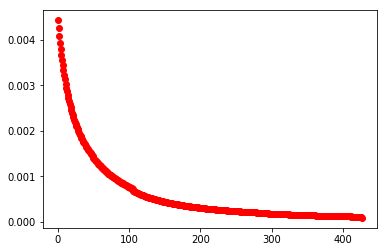

In [11]:
print(np.sum(np.abs(x_ista)))
plt.plot(err[1:],'ro')

#### Question 4.3

In [12]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cross_validation import train_test_split
A_train,A_test,b_train,b_test = train_test_split(A, b, test_size=0.3, random_state=42)

In [13]:
def holdout(alpha,rayon): #alpha and rayon two lists of parameters
    err_ista = []
    err_prox_grad = []
    print('starting test for alpha')
    for a in alpha:
        print(a)
        x_ista,_,_= ista(A_train,b_train,10**a,verbose = False) ### ///!\\\ ###
        err_ista.append(loss_linreg(x_ista,A_test,b_test))
    print('starting test for r')
    for r in rayon:
        print(r)
        x_prox_grad = proximal_gradient(10**r,A_train,b_train) ### ///!\\\ ###
        err_prox_grad.append(loss_linreg(x_prox_grad,A_test,b_test))
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(alpha,err_ista)
    ax1.set_title('error on train set for different alpha')
    ax2.plot(rayon,err_prox_grad)
    ax2.set_title('error on train set for different r')
    return(err_ista,err_prox_grad)
        

starting test for alpha
0.5
0.7
0.8
0.9
1
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
starting test for r
-0.5
-0.4
-0.3
-0.2
-0.1
0
0.1
0.2
0.3
0.4
0.5


([23.231244571968112,
  22.951850192855119,
  22.701631031737108,
  22.532858371860357,
  22.359468924173079,
  22.251843355876407,
  22.154209168131381,
  22.293862881124259,
  22.201861212147918,
  22.648013837906124,
  23.537934172205244,
  23.845227475055648,
  23.845227475055648,
  23.845227475055648],
 [22.651368178283889,
  22.390949302410736,
  22.111941009481196,
  21.770051001940249,
  21.396972782081917,
  21.023353375396397,
  20.705328585032458,
  20.546961324759152,
  20.730203455089384,
  21.567331216624424,
  23.582492865083509])

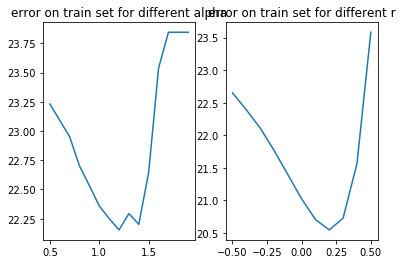

In [14]:
alpha = [0.5,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
rayon = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]
holdout(alpha,rayon)

In [15]:
import time
t = time.time()
ista(A_train,b_train,1.25,verbose = False)
print('time of computation for ISTA: %s' % str(time.time()-t))

t = time.time()
proximal_gradient(0.20,A_train,b_train)
print('time of computation for proximal gradient: %s' % str(time.time()-t))

time of computation for ISTA: 0.15190339088439941
time of computation for proximal gradient: 0.11182904243469238


alpha = 10^1.25 and r = 10^0.20 seems so have the best results but the proximal gradient seems to have better results than ISTA in this situation (for time and precision)

### 5 - Extension

for such a problem all the first-order methode allowing to find the minimum are effective (FISTA,...) we can also use the Stochastic ones (SAG,SGD,...) to speed up the time of computation.